# Métodos Computacionales


## Unidad 2: 

### Interpolación

- Interpolación Lineal 
- Interpolación de Lagrange
- Interpolación de Newton
- Interpolacón de Hermite


## Taller

**1)** Realice y grafique el siguiente problema:

**A.** Considere la ecuación de la recta que usted quiera, luego considere una serie de puntos alrededor de esa recta.

**B.** Luego considere un criterio e implementarlo en un algoritmo para reproducir la recta a partir de los puntos, sin usar la ecuación de la recta. 

Ejemplo: 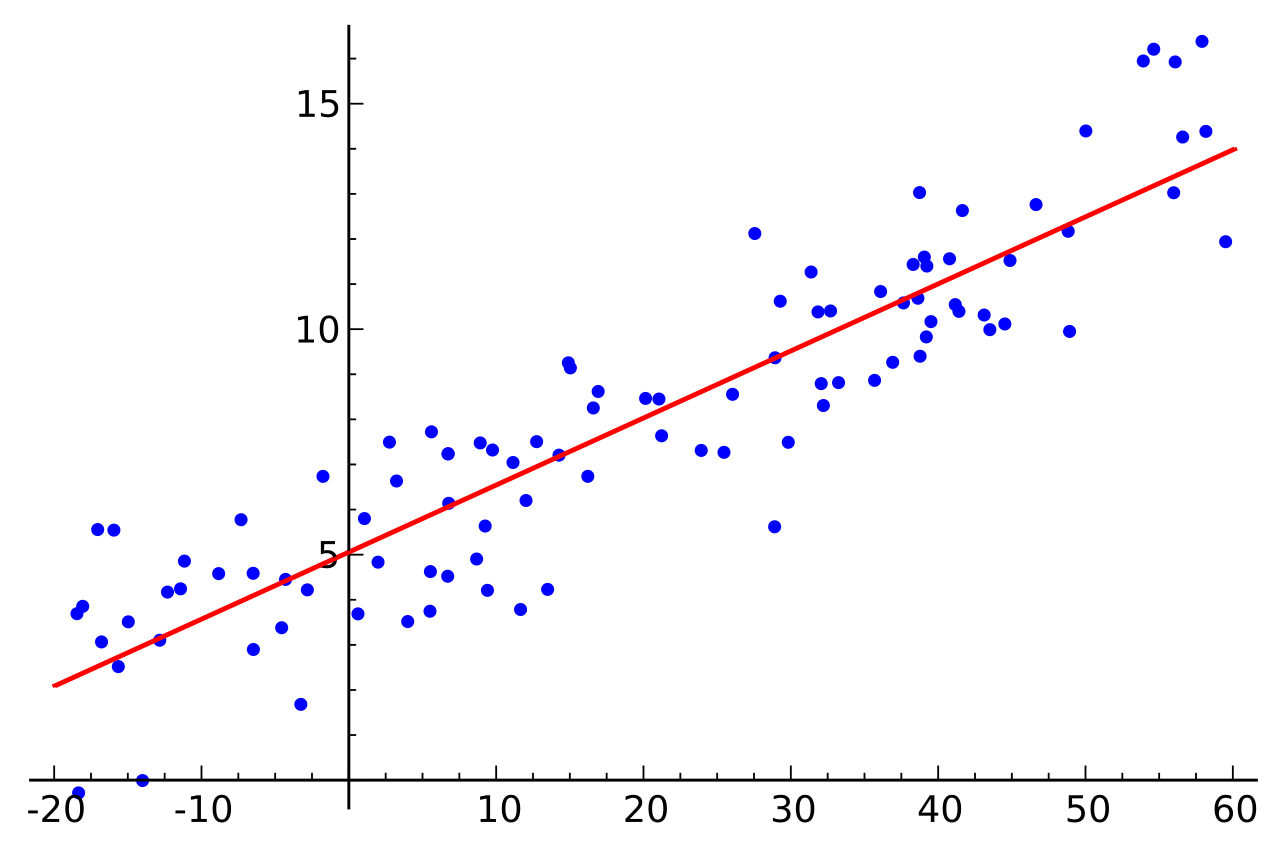

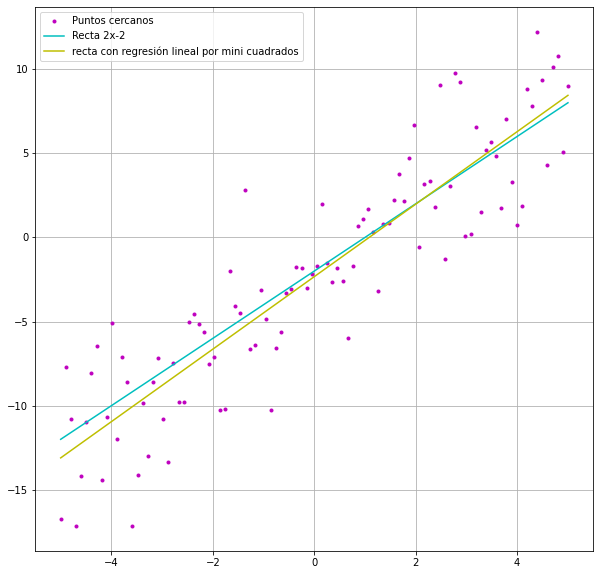

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import random
import pandas as pd
import sympy
from scipy import interpolate

#Crear los puntos cerca a la recta
recta= lambda x: 2*x-2
x=np.linspace(-5,5,100)
p=np.random.random(len(x))*np.random.randint(-10,10,len(x))
puntos=recta(x)+p

#Gráfica de los puntos y la recta real
fig = plt.figure(figsize = (10,10))
plt.plot(x,puntos, '.m', label='Puntos cercanos')
plt.plot(x,recta(x), 'c', label='Recta 2x-2')

#Se usa el método de los minimos cuadrados para hacer el ajuste
def m(x,y):      #se halla la pendiente de la recta
    num= len(x)*np.sum(x*y) - np.sum(x)*np.sum(y)
    den= len(x)*np.sum(x**2) - (np.sum(x))**2
    m=num/den
    return (m)
def b(x,y):  #se halla el intercepto
    num= np.sum(y)*np.sum(x**2) - np.sum(x)*np.sum(x*y)
    den= len(x)*np.sum(x**2) - (np.sum(x))**2
    b=num/den
    return b

Y= m(x,puntos)*x + b(x,puntos) #ecuación de la recta hallada con los puntos

plt.plot(x,Y, 'y', label='recta con regresión lineal por mini cuadrados')
plt.legend()
plt.grid()

**2)** Escriba de forma general el algoritmo de lagrange y úselo para realizar el problema visto en el ejemplo de la clase.  
*x = [0, 1, 2]* y *y = [1, 3, 2]*.

In [2]:
def LagrangeP(x,X,Y):   #X y Y deben tener la misma cantidad de elementos y los elemento en X no se pueden
    Polis=[]             #repetir pues crearía una ind en el denominador
    for i in range(len(X)):
        Xk=np.copy(X)
        Pr=np.delete(Xk,Xk[i])
        num=1
        for k in range(len(Pr)):   #numerador de cada Pi(x)
            num=num*(x-Pr[k])
        den=1
        for k in range(len(Pr)):   #Denominador de cada Pi(x)
            den=den*(X[i]-Pr[k])
        Poli=num/den
        Polis.append(Poli)
    return(Polis)  #Esta función entrega los polinomios hallados con los X (puntos) dados evaluados en las x (x_new)
    
def LagrangeL(x,X,Y):
    Polis=[]
    for i in range(len(X)):
        Xk=np.copy(X)
        Pr=np.delete(Xk,Xk[i])
        num=1
        for k in range(len(Pr)):
            num=num*(x-Pr[k])
        den=1
        for k in range(len(Pr)):
            den=den*(X[i]-Pr[k])
        Poli=num/den
        Polis.append(Poli)
    L=0
    for i in range(len(Y)):  #Aquí se hace la sumatoria de los Y multiplicados por cada polinomio evaluado en las x
        L=L+(Y[i]*Polis[i])  #Esta función devuelve el L para cada x dado, no sé por qué al final al graficar lo que me entrega
    return L                 #es una línea recta. Hallé el L a mano para cada x_new y me dio justo lo que me da en el programa

L para cada x_new con la función LagrangeL [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]


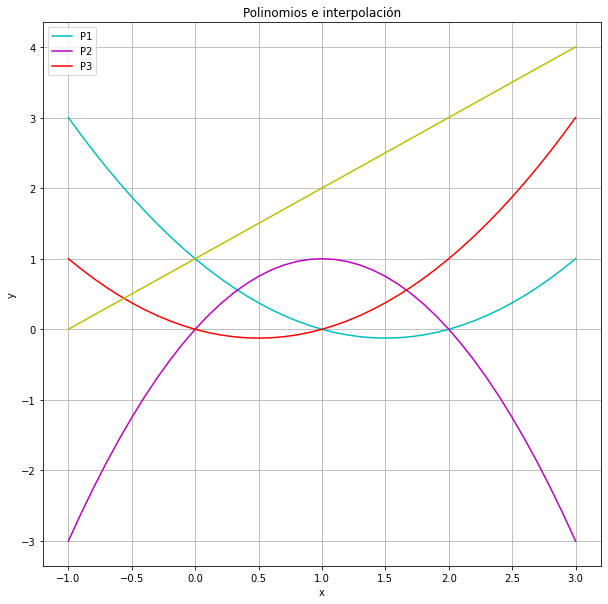

In [3]:
X=[0,1,2]
Y=[1,2,3]
x_new = np.arange(-1.0, 3.1, 0.1)

y_new=LagrangeP(x=x_new,X=X, Y=Y) #Esto entrega, en este caso, los 3 polinomios evaluados en x_new
Lf=LagrangeL(x=x_new, X=X, Y=Y)        #Esto entrega el L evaluado en cada x_new

print("L para cada x_new con la función LagrangeL", Lf)
fig = plt.figure(figsize = (10,10))
plt.plot(x_new,y_new[0],'c', label='P1')  #Aquí grafiqué cada polinomio evaluado en x_new
plt.plot(x_new,y_new[1],'m', label='P2')
plt.plot(x_new,y_new[2],'r', label='P3') 
plt.plot(x_new,Lf,'y')      #Esta es la gráfica de L evaluado en cada x_new

plt.title('Polinomios e interpolación')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()


**3)** Calcula la tabla de diferencias divididas para x = [-5, -1, 0, 2], y = [-2, 6, 1, 3]. y gráfica el polinomio de Newton 
    

Text(0.5, 1.0, 'Polinomio de Newton')

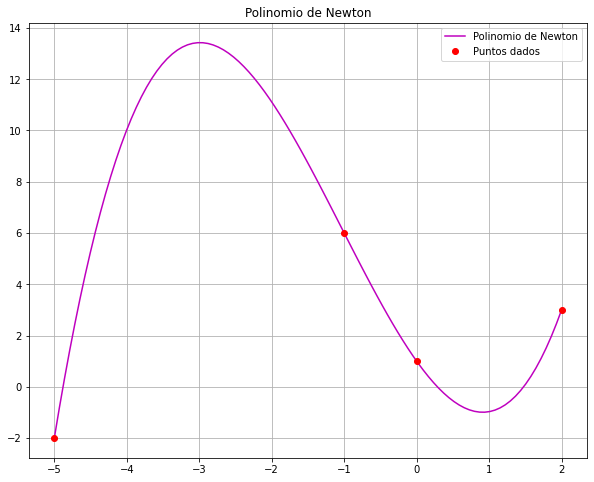

In [4]:
def Dd(x, y):  #Diferencias divididas sólo para 4 puntos
    m = len(x) 
    f2=[]
    f3=[]
    f4=[]
    a=[]
    #Primera diferencia
    for i in range(m-1):        
        f2.append((y[i+1] - y[i])/(x[i+1] - x[i]))
    #Segunda diferencia
    for i in range(m-2): 
        f3.append( (f2[i+1] - f2[i])/(x[i+2] - x[i]) )
    #Tercera diferencia
    for i in range(m-3):
        f4.append((f3[i+1] - f3[i])/(x[i+3] - x[0]))
    a.append(y[0])       #Aquí agrego a 'a' los primeros términos de las diferencias hallas que es lo que nos interesa
    a.append(f2[0])
    a.append(f3[0])
    a.append(f4[0])
    return x, y, f2, f3, f4, a #a son los coeficientes del Polinomio

def Poli(x, y, w): #Esta es la función para encontrar el polinomio con los coeficientes a hallados
    m= len(x) 
    a= Dd(x, y)[-1]
    S= a[0]
    Xx= 1.0
    for j in range(len(a)-1):
        Xx= Xx*(w-x[j])
        S= S + a[j+1]*Xx
    return S


x=[-5, -1, 0, 2]
y=[-2, 6, 1, 3]
Dif_div=Dd(x,y)
#Esta es la tabla de diferencias dividas que puse después de la gráfica
Tabla_dif_div = pd.DataFrame(Dif_div, index=['X', 'Y', 'F1', 'F2', 'F3','a']).transpose()

xdatos=np.linspace(-5,2,100)

fig=plt.figure(figsize=(10,8))
plt.plot(xdatos, Poli(x, y, xdatos), 'm',label="Polinomio de Newton")
plt.plot(x, y, 'or', label='Puntos dados')
plt.grid()
plt.legend()
plt.title('Polinomio de Newton')

In [5]:
Tabla_dif_div.style

,X,Y,F1,F2,F3,a
0,-5.000000,-2.000000,2.000000,-1.400000,0.485714,-2.000000
1,-1.000000,6.000000,-5.000000,2.000000,nan,2.000000
2,0.000000,1.000000,1.000000,nan,nan,-1.400000
3,2.000000,3.000000,nan,nan,nan,0.485714


**4)** Escriba de forma general el algoritmo de hermite y úselo para realizar el problema visto en el ejemplo de la clase. 

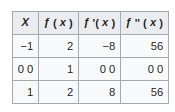

Text(0.5, 1.0, 'Interpolación con Hermite')

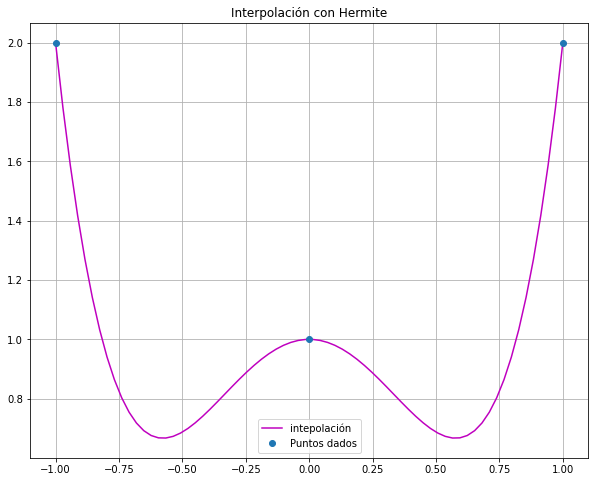

In [6]:
X=[-1, 0.0, 1]
Y=[2, 1, 2]
Y1=[-8, 0.0, 8]
Y2=[56, 0.0, 56]

def Ddder(x, y, Y1): #Hallar las diferencias divididas para 3 puntos y su derivada
    m= len(x) 
    z=[]
    fy=[]
    fp=[]
    fp2=[]
    fp3=[]
    fp4=[]
    a=[]
    for i in range(m): #Aquí se duplican las x
        z.append(x[i])
        z.append(x[i])
    for i in range(m): #Aquí se duplican las f(x)
        fy.append(y[i])
        fy.append(y[i])
    a.append(fy[0])
    for i in range(0,m-1):  #Aquí se hallan las primeras diferencias divididas
        fp.append(Y1[i])
        fp.append((fy[2*i+2]-fy[2*i+1])/(z[2*i+2]-z[2*i+1]))
    fp.append(Y1[m-1])
    a.append(fp[0])           #Sólo se necesitan los primeros terminos de cada diferencia dividida
    for i in range(m+1): #Segunda diferencia
        fp2.append((fp[i+1]-fp[i])/(z[i+2]-z[i]))
    a.append(fp2[0])
    for i in range(m): #Tercera diferencia
        fp3.append((fp2[i+1]-fp2[i])/(z[i+3]-z[i]))
    a.append(fp3[0])
    for i in range(m-1): #Cuarta diferencia
        fp4.append((fp3[i+1]-fp3[i])/(z[i+4]-z[i]))
    a.append(fp4[0])
    return a    #a terminan siendo los coeficientes del polinomio

def Hermite(x, y, Y1, w):
    m = len(x) 
    a = Ddder(x, y, Y1)
    z = []
    for i in range(m): 
        z.append(x[i])
        z.append(x[i])
    suma = a[0]
    pr = 1.0
    for j in range(len(a)-1):   #Se forma el polinomio
        pr *= w-z[j]
        suma += a[j+1]*pr
    return suma

xdatos=np.linspace(-1,1,70)
ydatos=Hermite(X, Y, Y1, xdatos)

fig=plt.figure(figsize = (10,8))
plt.plot(xdatos, ydatos,'m', label='intepolación')
plt.plot(X, Y, 'o', label='Puntos dados')
plt.grid()
plt.legend()
plt.title('Interpolación con Hermite')


    
**5)** Considere l función $sin^2(x)$ entre 0 y $2\pi$

**** Genere un conjunto de puntos correspondientes  l función nterior y  prtir de estos encuentre el polinomio de Newton.

**B** Genere un conjunto de puntos correspondientes  l función nterior y otro conjunto de puntos correspondientes  l derivd de est función(relicel de form nlitic) pr encontrr con estos el polinomio de hermite. 


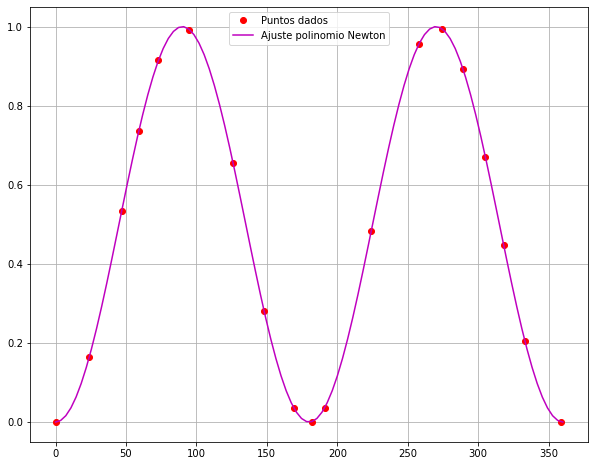

In [7]:
#Parte A
def Dd1(x, y):  #Función general de diferencias divididas sin derivadas
    m = len(x) 
    a=[]
    a.append(y[0])
    for j in range(m-1):
        for i in range(m-(j+1)):
            y[i]=(y[i+1] - y[i])/(x[i+j+1] - x[i])
            if i==0:
                a.append(y[0])
    return a

def Poli1(x, y, w):  #Función para crear el polinomio que ajusta los puntos a una función con las diferencias halladas
    m= len(x)  
    a= Dd1(x, y)
    S= a[0]
    Xx= 1.0
    for j in range(len(a)-1):
        Xx= Xx*(w-x[j])
        S= S + a[j+1]*Xx
    return S

#Teniendo ya la función para hallar las diferencias y el polinomio se buscan los puntos.
#La siguiente es una lista de ángulos entre 0-360 y luego se evaluan en la función para obtener los puntos x,y.

x=[0,24,47,59,73,95,126,148,169,182,191,224,258,274,289,305,318,333,359]
f= lambda x: (np.sin(np.deg2rad(x)))**2
puntos=f(x)
xd=np.linspace(0,360, 100)

#Gráfica de los puntos y la el polinomio
fig=plt.figure(figsize = (10,8))
plt.plot(x, puntos, 'or', label='Puntos dados')
plt.plot(xd, Poli1(x, puntos, xd), '-m',label='Ajuste polinomio Newton')
plt.grid()
plt.legend()

